In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Titanic.csv',index_col='PassengerId')

In [4]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
 10  Mod_Age   891 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.5+ KB


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
data['Mod_Age'] = data['Age'].fillna(data['Age'].mean())

In [11]:
data[['Mod_Age','Age']]

,Mod_Age,Age
PassengerId,,
1,22.000000,22.0
2,38.000000,38.0
3,26.000000,26.0
4,35.000000,35.0
5,35.000000,35.0
...,...,...
887,27.000000,27.0
888,19.000000,19.0
889,29.699118,NaN


In [13]:
data = data.drop(columns=['Cabin'])

In [14]:
# data['Embarked'] = data['Embarked'].dropna()

In [19]:
data = data.drop(index = data[data['Embarked'].isnull()].index)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
 10  Mod_Age   889 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.3+ KB


In [21]:
data.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 889, dtype: float64

In [22]:
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='Sex', ylabel='count'>

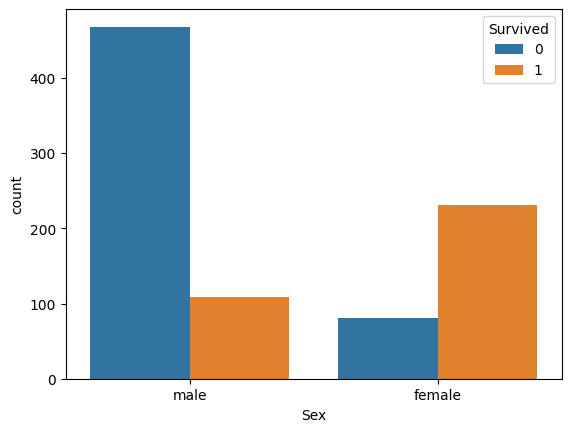

In [28]:
sns.countplot(data, x = 'Sex', hue = 'Survived')

In [27]:
data['Sex'].value_counts()/data.shape[0]

Sex
male      0.649044
female    0.350956
Name: count, dtype: float64

In [31]:
data_men = data[data['Sex'] == 'male']
data_female = data[data['Sex'] == 'female']

In [32]:
data_men['Survived'].value_counts()/data_men.shape[0]

Survived
0    0.811092
1    0.188908
Name: count, dtype: float64

In [33]:
data_female['Survived'].value_counts()/data_female.shape[0]

Survived
1    0.740385
0    0.259615
Name: count, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

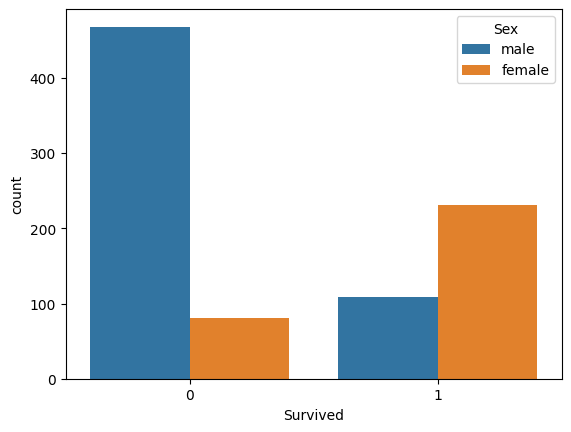

In [34]:
sns.countplot(data, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='Age'>

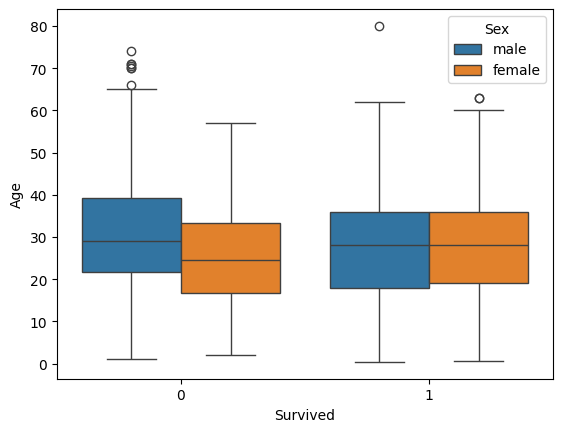

In [42]:
sns.boxplot(data, x='Survived', y='Age', hue='Sex')

<Axes: xlabel='Sex', ylabel='Age'>

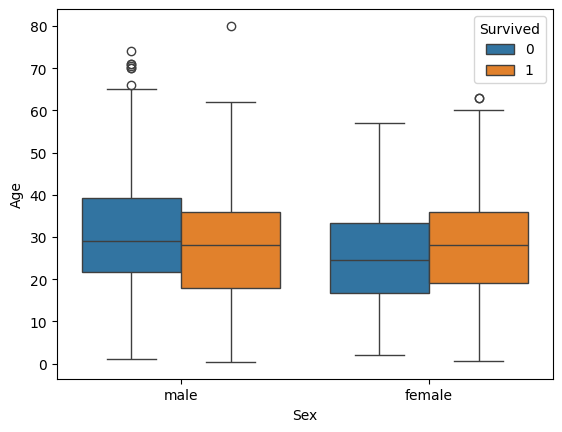

In [43]:
sns.boxplot(data, x='Sex', y='Age', hue='Survived')

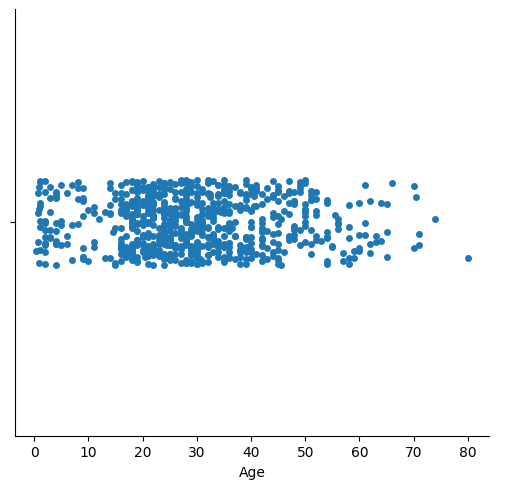

In [44]:
sns.catplot(data, x='Age')

In [50]:
pd.crosstab(data['Embarked'],data['Pclass'], values=data['Survived'], aggfunc='mean')

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


In [53]:
data['Alone'] = data['SibSp'] + data['Parch'] == 0

In [54]:
data['Alone']

PassengerId
1      False
2      False
3       True
4      False
5       True
       ...  
887     True
888     True
889    False
890     True
891     True
Name: Alone, Length: 889, dtype: bool

<Axes: xlabel='Survived', ylabel='count'>

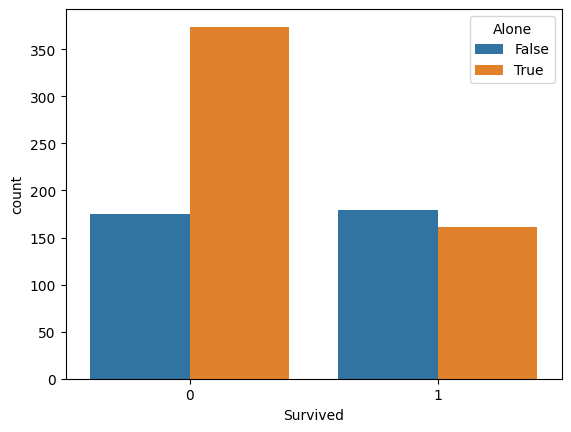

In [58]:
sns.countplot(data, x='Survived', hue='Alone')

<Axes: xlabel='Sex', ylabel='Survived'>

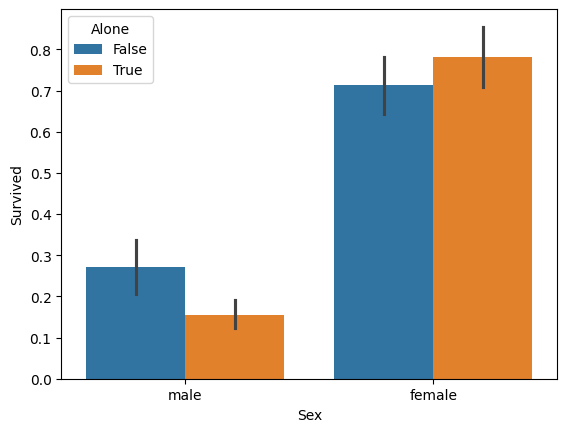

In [61]:
sns.barplot(data, x='Sex', y='Survived', hue='Alone')

In [62]:
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1

In [63]:
data['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 889, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

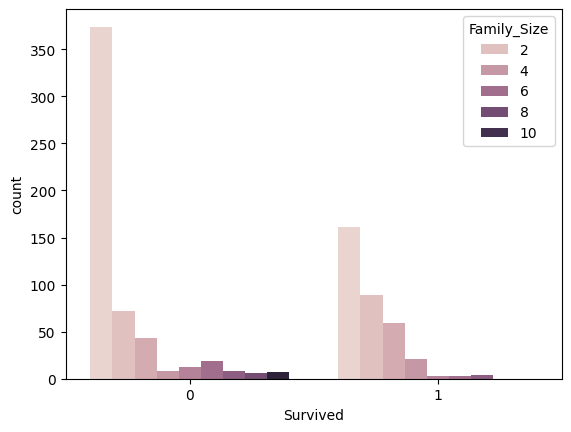

In [64]:
sns.countplot(data, x='Survived', hue='Family_Size')

<Axes: xlabel='Fare', ylabel='Count'>

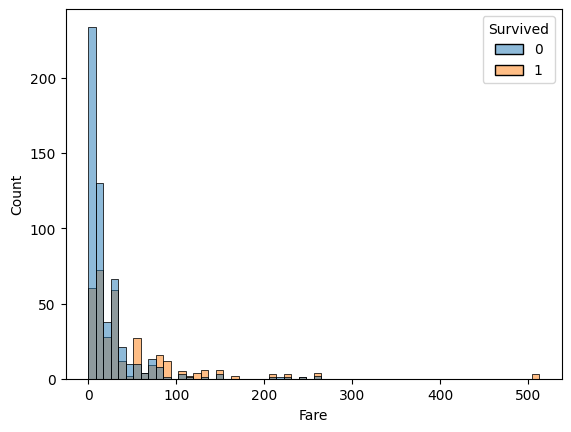

In [73]:
sns.histplot(data, x='Fare', hue='Survived')